In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

from Analysis import Astro_analysis
from Astro_morphology import Process, Soma, Connect
from Astro import Astro_multi_compartment
from Parameters import p
from helper_plots import *

import Stimulus
from Stimulus_gen import Stimulus_gen

#### 1. Set up of the multi-compartment model

In [2]:
# ratio of internal calcium stores
p['ratio'] = 0.15 * np.exp(-0.002*(1**2.32))

# define morphology
p1 = Process(end_condition = 'sealed_end')

morpho = Connect([p1])
morpho.no_connection()

#### 2. Simulation

In [3]:
p['time'] = 300
p['tstart'] = 100
p['tstop'] = 200

# generate stimulus
glut_conc = 0.1
stim = Stimulus_gen(morpho.N, p['time'], p['dt'],
                          p['tstart'], p['tstop'],
                          p['input_length'], morpho.length, glut_conc)
stim.generate_stimulus()

In [7]:
# simulate system
p['I_GluT_max'] = 8#6.8#0.9
p['P_max'] = 4.5 * 1e-6#0.01 * 1.52/p['F']

# tortuosity
p['lamb_intra'] = 3.2
p['lamb_extra'] = 3.2

astro = Astro_multi_compartment(params = p, model_type='NKV_Calcium',
                                stimulus = stim.glut_stimulus, morpho = morpho)

#### 3. Plot

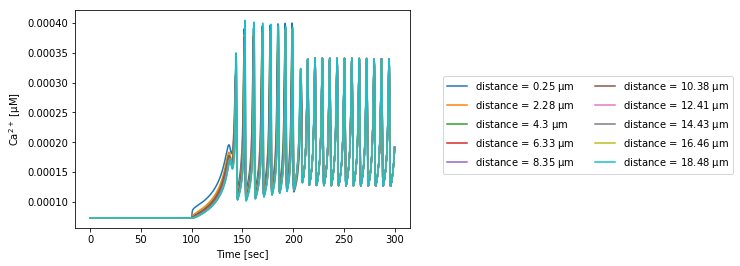

In [8]:
plot_time_series_single(morpho.N, astro.time, 
                        astro.dt, astro.C, 
                        morpho.length, r'$\mathsf{Ca^{2+}\/\/[\mu M]}$')

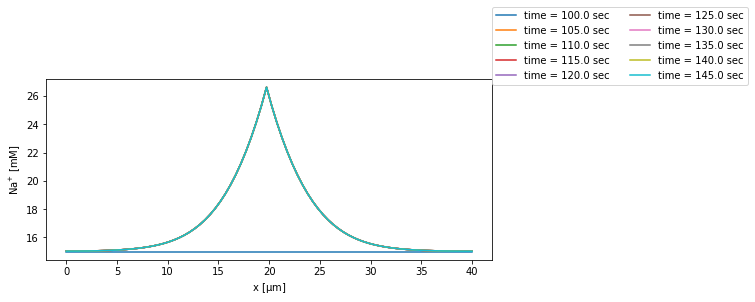

In [9]:
plot_spatial_series_single(astro.Na, morpho.length,
                        morpho.N, r'$\mathsf{Na^{+}\/\/[mM]}$')